In [1]:
using Graphs, Plots, DelimitedFiles
import Statistics: mean
include("../mpdbp.jl")
include("../exact/montecarlo.jl")
include("../exact/random_regular.jl")
include("../ensemble.jl")
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [ ]:
q = q_glauber
T = 50
N = 10^3
k = 4
gg = random_regular_graph(N, k)
g = IndexedGraph(gg)
h = zeros(N)
J = ones(ne(g))
β = 1.0
ising = Ising(g, J, h, β)
p⁰ = map(1:N) do i
    r = 0.75
    [r, 1-r]
end

gl = Glauber(ising; p⁰);

Run Monte Carlo

In [115]:
gs = sample(gl, nsamples=10^3, showprogress=true);

Sampling from Glauber 100%|██████████████████████████████| Time: 0:00:26


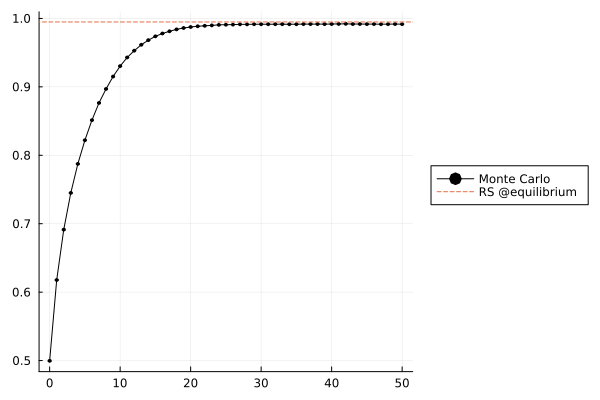

In [132]:
m = magnetizations(gs)
mm = mean(m, dims=2) |> vec
pl = plot(0:T, mm, label="Monte Carlo", m=:o, ms=2, c=:black)
m_eq = rs_magnetization_fixedpoints(β, 1.0, k)
hline!(pl, [m_eq[end]], ls=:dash, label="RS @equilibrium", legend=:outerright)

In [128]:
open("montecarlo_N$(N).txt", "w") do io
   writedlm(io, [0:T getproperty.(mm, :val)])
end

In [129]:
x0 = [rand(Bernoulli(pp[2])) for pp in p⁰] .+ 1
egs = sample(ising, nsamples=10^4, ntherm=0; x0)
m_eq_mc = mean(magnetizations(egs));

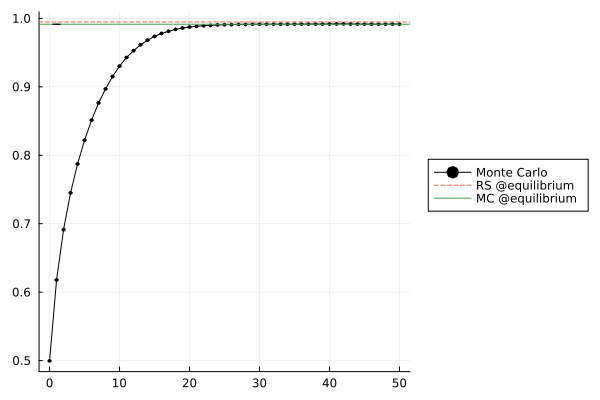

In [133]:
hline!(pl, [m_eq_mc], label="MC @equilibrium")